In [1]:
# !wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.2018.nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
d = Dataset('air.2m.gauss.2018.nc')

In [3]:
lons = d.variables['lon'][:]
lats = d.variables['lat'][:]
airs = d.variables['air'][:]
airs_unit = d.variables['air'].units

In [4]:
# 经纬度平均值
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(lat_0=lat_0, lon_0=lon_0)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

/Users/zliu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zliu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


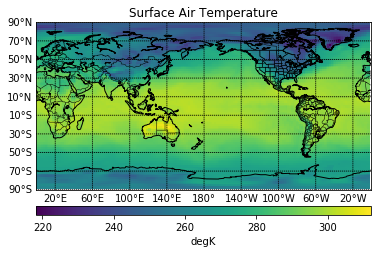

In [5]:
# Add Grid Lines
# 绘制经纬线
m.drawparallels(np.arange(-90., 91., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# Plot Data
# 这里我的tlml数据是24小时的，我这里只绘制第1小时的（tlml_0）
airs_0 = airs[0:1:, ::, ::]
cs = m.pcolor(xi, yi, np.squeeze(airs_0))

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(airs_unit)
plt.title('Surface Air Temperature')
plt.show()